In [2]:
import json

test_qas = json.load(open("/private/home/xwhan/data/hotpot/hotpot_test_fullwiki_v1.json"))
test_results = json.load(open("/private/home/xwhan/data/hotpot/results/hotpot_test_b200_k500.json"))

In [4]:
len(test_qas) == len(test_results["answer"])

True

In [15]:
import random
qid2question = {_["_id"]:_["question"] for _ in test_qas}
qids = list(test_results["answer"].keys())
random.shuffle(qids)



print(qid2question[qids[0]])
print(test_results["answer"][qids[0]])

Who has been in more bands, Deron Miller or Steve Marriott?
Deron John Miller


In [63]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install seaborn --user

  Using cached https://files.pythonhosted.org/packages/c7/e6/54aaaafd0b87f51dfba92ba73da94151aa3bc179e5fe88fc5dfb3038e860/seaborn-0.10.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/96/a7/b6fa244fd8a8814ef9408c8a5a7e4ed0340e232a6f0ce2046b42e50672c0/matplotlib-3.3.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/30/bf/92385b4262178ca22b34f82e0e09c2922eb351fe39f3cc7b8ba9ea555b41/Pillow-7.2.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5e/c4/6c4fe722df5343c33226f0b4e0bb042e4dc13483228b4718baf286f86d87/certifi-2020.6.20-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ae/23/147de658aabbf968324551ea22c0c13a00284c4ef49a77002e91f79657b7/kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl
You are using pip version 9.0.1, however version 20.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


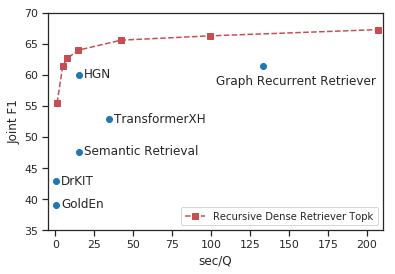

In [119]:
# figure showing the efficieicnty trade off using 16-core CPUs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
# Asai et al.2020
plt.xlim(-5, 210)
plt.ylim(35, 70)

# Asai et al. 500 + 8*3
plt.scatter(133, 61.4, c='#1f77b4')
plt.text(133 - 30, 61.4 - 3, "Graph Recurrent Retriever")

# Gold 
plt.scatter(0.5, 39.1, c='#1f77b4')
plt.text(3.5, 39.1 - 0.5, "GoldEn")

# DiKIT
plt.scatter(0.5, 42.9, c='#1f77b4')
plt.text(3.5, 42.9 - 0.5, "DrKIT")

# Semmantic Retrieval
plt.scatter(50*0.3, 47.6, c='#1f77b4')
plt.text(50*0.3 + 3, 47.6 - 0.5, "Semantic Retrieval")

# HGN
plt.scatter(50*0.3, 60.0, c='#1f77b4')
plt.text(50*0.3 + 3, 60 - 0.5, "HGN")

# TransformerXH 115 cross attention 52.9
plt.scatter(115*0.3, 52.9, c='#1f77b4')
plt.text(115*0.3 + 3, 52.9 - 0.5, "TransformerXH")


time_f1s = [(1.02, 55.5), (4.7, 61.5), (7.7, 62.7), (14.7, 64.0), (42, 65.6), (99.2, 66.3), (207, 67.3)]
xs = [_[0] for _ in time_f1s]
ys =[_[1] for _ in time_f1s]
plt.plot(xs,ys, linestyle='--', marker='s', c='r', label='Recursive Dense Retriever Topk')

plt.xlabel('sec/Q', fontsize=12)
plt.ylabel('Joint F1', fontsize=12)

lg = plt.legend(loc='lower right', fontsize=10)
frame = lg.get_frame()
# frame.set_edgecolor('black')
lg.draw_frame(True)


plt.savefig('efficiency.pdf')
plt.show()

In [431]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

/public/apps/anaconda3/5.0.1/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


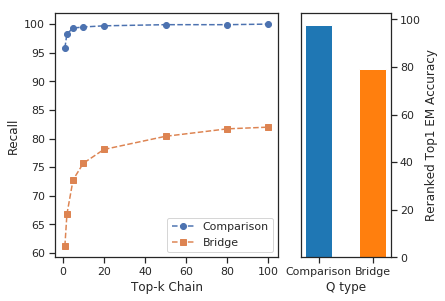

In [450]:
# lines comparing the performance of bridge and comparison questions, use beam search to get top100
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.color_palette("tab10")
sns.set(style='ticks')

k = [1,2,5,10,20,50,80,100]
comparison = [95.8, 98.3, 99.3, 99.5, 99.7, 99.9, 99.9,100]
bridge = [61.2, 66.8, 72.8, 75.7, 78.1, 80.4, 81.7, 82.0]

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2.5, 1]})
a0.plot(k, comparison, marker="o", linestyle='--', label="Comparison")
a0.plot(k, bridge, marker="s", linestyle='--', label="Bridge")
a0.set_xlabel('Top-k Chain')
a0.set_ylabel('Recall')
a0.legend()

a1.yaxis.tick_right()
a1.yaxis.set_label_position("right")
p = a1.bar(np.arange(2), [97.8, 79.0], 0.5, color=('#1f77b4', '#ff7f0e'))
autolabel(p)
a1.set_xlabel('Q type')
a1.set_ylabel('Reranked Top1 EM Accuracy')
plt.sca(a1)
plt.xticks(np.arange(2), ["Comparison", "Bridge"])
f.tight_layout(pad=0.05)
plt.savefig('retrieva_types.pdf')
f.show()


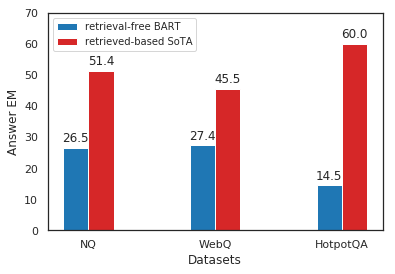

In [451]:
# close-book QA diagnosis experiments
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_style("white")
sns.set_palette("colorblind", 10)
# sns.set_color_codes("g")
bart_ems = [26.5, 27.4, 14.5]
datasets = ["NQ", "WebQ", "HotpotQA"]
sota_ems = [51.4, 45.5, 60.0]

width = 0.2
ind = np.arange(3)
fig, ax = plt.subplots()
p1 = ax.bar(ind - width/2, bart_ems, width, label="retrieval-free BART", color='tab:blue')
p2 = ax.bar(ind + width/2, sota_ems, width, label="retrieved-based SoTA", color='tab:red')
plt.xticks(ind, datasets)
# plt.yticks(np.arange(0, 60, 10))
plt.ylabel('Answer EM', fontsize=12)
plt.xlabel('Datasets', fontsize=12)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(p1)
autolabel(p2)

lg = plt.legend(loc='upper left', fontsize=10)
frame = lg.get_frame()
lg.draw_frame(True)
plt.ylim(0, 70)
plt.savefig('retrieval_free.pdf')
plt.show()

In [177]:
# evalute TFIDF hotpotQA retrieval results
import json
val_inputs = [json.loads(l) for l in open("/private/home/xwhan/data/hotpot/hotpot_qas_val.json").readlines()]
tfidf_results = json.load(open("/private/home/xwhan/data/hotpot/tfidf/hotpot_dev_tfidf_results.json"))
k = 20

tfidf_covered = []
bm25_covered = []
for gold, res in zip(val_inputs, tfidf_results):
    assert gold["question"] == res["question"]
    
    gold_sp = gold["sp"]

    tfidf_topk = res["tfidf_topk"][:k]
    bm25_topk = res["bm25_topk"][:k]
    
    tfidf_covered.append(np.sum([int(_ in tfidf_topk) for _ in gold_sp]) == len(gold_sp))
    bm25_covered.append(np.sum([int(_ in bm25_topk) for _ in gold_sp]) == len(gold_sp))

print(len(tfidf_covered))
print(np.mean(tfidf_covered))
print(np.mean(bm25_covered))

7405
0.3683997299122215
0.6267386900742742


In [188]:
# get transformerXH P EM
dev_transformer_xh = [json.loads(l) for l in open("/private/home/xwhan/code/Transformer-XH/data/hotpot_dev_graph.json").readlines()]
qid2goldsp = {_["_id"]:_["sp"] for _ in val_inputs}

In [192]:
len(dev_transformer_xh[2]["node"])
p_covered = []
for item in dev_transformer_xh:
    node_names = set([_["name"] for _ in item["node"]])
    qid = item["qid"]
    gold_sp = qid2goldsp[qid]
    gold_sp = [_.lower().replace(" ", "_") for _ in gold_sp]
    p_covered.append(np.sum([int(_ in node_names) for _ in gold_sp]) == len(gold_sp))
print(len(p_covered))
print(np.mean(p_covered))

5904
0.8162262872628726


In [294]:
id2doc = json.load(open("/private/home/xwhan/Mhop-Pretrain/retrieval/index/abstracts_id2doc.json"))
title2text = {v[0]:v[1] for v in id2doc.values()}

In [332]:
# pick an intro example to use 
val_inputs = [json.loads(l) for l in open("/private/home/xwhan/data/hotpot/hotpot_qas_train.json").readlines()]
bridge_val = [_ for _ in val_inputs if _["type"] == "bridge" and len(_["question"].split()) < 10]

In [371]:
print(len(bridge_val))
import random
random.shuffle(bridge_val)
print(bridge_val[0])

3826
{'question': 'In what country is the Holtermann collection located?', '_id': '5adff69955429925eb1afba6', 'answer': ['Australia'], 'sp': ['Holtermann collection', 'Hill End, New South Wales'], 'type': 'bridge'}


In [328]:
title2text['Clark Gable']

'Girl 27 is a 2007 documentary film about the 1937 rape of dancer and sometime movie extra Patricia Douglas (1917-2003) at an M-G-M exhibitors\' convention, the front-page news stories that followed, and the studio\'s subsequent cover-up of the crime. Also covered in the film are a similar assault on singer Eloise Spann and her subsequent suicide, and the better-known scandal involving actress Loretta Young and her "adopted" daughter Judy Lewis, the product of her affair with Clark Gable during the production of "The Call of the Wild".'

In [ ]:
{'question': "What was the nickname of Judy Lewis's father?", '_id': '5a80b9df5542992bc0c4a7ec', 'answer': ['"The King of Hollywood"'], 'sp': ['Girl 27', 'Clark Gable'], 'type': 'bridge'}
{'question': 'In what county is The Third Fitzwilliam Meetinghouse located?', '_id': '5a888d535542997e5c09a617', 'answer': ['Cheshire County, New Hampshire'], 'sp': ['Third Fitzwilliam Meetinghouse', 'Fitzwilliam, New Hampshire'], 'type': 'bridge'}
{'question': 'Where does the descendant of the Red Setter originate? ', '_id': '5abde4595542991f66106095', 'answer': ['Scotland'], 'sp': ['Irish Setter', 'Scotch Collie'], 'type': 'bridge'}

In [453]:
corpus = json.load(open("index/hotpotQA_corpus_dict.json"))
title2text = {v["title"]:v["text"] for v in corpus.values()}

In [456]:
# bridge errors after reranking
val_inputs = [json.loads(l) for l in open("/private/home/xwhan/data/hotpot/hotpot_qas_val.json").readlines()]
id2goldsp = {_["_id"]:_["sp"] for _ in val_inputs}
id2goldans = {_["_id"]:_["answer"] for _ in val_inputs}
id2type = {_["_id"]:_["type"] for _ in val_inputs}
id2item = {_["_id"]:_ for _ in val_inputs}
results = json.load(open("/private/home/xwhan/data/hotpot/results/hotpot_val_b250_k250.json"))

In [469]:
bridge_errors = []
bridge_c = 0
for qid in results["titles"].keys():
    type_ = id2type[qid]
    if type_ != "bridge":
        continue
    chain = results["titles"][qid]
    sp = id2goldsp[qid]
    sp_covered = int(np.sum([int(_ in chain) for _ in sp]) == len(sp))
    if not sp_covered:
        bridge_errors.append({
            "id":qid,
            "question": id2item[qid]["question"],
            "sp": sp,
            "error": chain,
            "answer": id2goldans[qid],
        })
    bridge_c += 1
print(len(bridge_errors)/ bridge_c)
print(len(results["titles"].keys()))

0.20986819871578236
7405


In [470]:
random.shuffle(bridge_errors)

In [546]:
id2error = {_["id"]: idx for idx, _ in enumerate(bridge_errors[:50])}
json.dump(id2error, open("/private/home/xwhan/data/hotpot/retrieval_errors_50sampled.json", "w"))

In [564]:
idx = id2error['5abba91e554299642a094b10']
item = bridge_errors[idx]
print(item)
print("Gold:")
for t in item["sp"]:
    print(title2text[t])
print("Predicted:")
for t in item["error"]:
    print(title2text[t])

{'id': '5abba91e554299642a094b10', 'question': 'What languages did the son of Sacagawea speak?', 'sp': ['Charbonneau, Oregon', 'Jean Baptiste Charbonneau'], 'error': ['Museum of Human Beings', 'Jean Baptiste Charbonneau'], 'answer': ['French and English']}
Gold:
Charbonneau (also known as the Charbonneau District) is a private planned community within the city limits of Wilsonville in Clackamas County, Oregon, United States. It is on the opposite side the Willamette River from the main area of the city. The development was named for Jean Baptiste Charbonneau, the son of Sacagawea.
Jean Baptiste Charbonneau (February 11, 1805 – May 16, 1866) was an American Indian explorer, guide, fur trapper trader, military scout during the Mexican-American War, "alcalde" (mayor) of Mission San Luis Rey de Francia and a gold prospector and hotel operator in Northern California. He spoke French and English, and learned German and Spanish during his six years in Europe from 1823 to 1829. He spoke Shosho